# PYTN_Assgn_1_Batch 006_Christian Lamhot Tua 

Pada Assignment 1 ini,saya menggunakan Dataset dari Kaggle yaitu the London Crime dari tahun 2008-2016.Dataset tersebut bernama  london_crime_by_lsoa.csv

# Data Preprocessing

## Import Library yang diperlukan

In [1]:
# Library Mengolah Data
import pandas as pd
import numpy as np

# Library Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
import folium

mpl.style.use(['ggplot'])

## Read Dataset

<b> Untuk read file dataset:</b>

In [2]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


<b> Dataset tersebut berisi variabel-variabel kolom dengan keterangan sebagai berikut : </b>
* lsoa_code : this represents a policing area
* borough : the london borough for which the statistic is related
* major_category : the major crime category
* minor_category : the minor crime category
* value : the count of the crime for that particular borough, in that particular month
* year : the year of the summary statistic
* month : the month of the summary statistic

<b>Untuk melihat 5 data teratas dari dataset:</b>

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


<b>Untuk melihat 5 data terakhir dari dataset</b>

In [4]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


<b>Untuk mendapatkan informasi tentang seluruh nama kolom,jumlah data yang kosong ditiap kolom serta tipe data pada masing-masing kolom dataset:</b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


<b> Untuk mengetahui dimensi dari dataset seperti informasi tentang jumlah baris dan kolom:</b>

In [6]:
df.shape

(13490604, 7)

<b> Untuk mengetahui daftar nama kolom yang ada didataset:</b>

In [7]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

<b> Untuk mengetahui daftar nilai indeks yang ada didataset:</b>

In [8]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

<b> Untuk mendapatkan ringkasan statistik deskriptif untuk kolom yang berisi tipe data numerik saja seperti count,mean,std,min,max dll: </b>

In [9]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


<b> Untuk mendapatkan ringkasan statistik deskriptif untuk kolom yang berisi tipe data string/objek saja seperti count,unique,top dan frequency:</b>

In [10]:
df.describe(include = object)

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003783,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


<b> Untuk mendapatkan jumlah banyaknya setiap data dengan nama yang berbeda/unique pada setiap kolom dataset: </b>

In [11]:
df.nunique()

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

<b> Untuk menjumlahkan semua data yang ada pada kolom lsoa_code :</b>

In [12]:
#lsoa_code bukan merupakan id yang dapat membedakan setiap baris data
df['lsoa_code'].value_counts().sum()

13490604

<b> Untuk memvalidasi bahwa tahun dari dataset the London Crime benar dari tahun 2008-2016:</b>

In [13]:
# Untuk memvalidasi bahwa tahun dari dataset the London Crime benar dari tahun 2008-2016
print('Dataset was recorded from ' + str(df.year.min()) + ' to ' + str(df.year.max()))

Dataset was recorded from 2008 to 2016


<b>Untuk mengecek null value pada setiap kolom dataset: </b>

In [14]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

<b> Setelah dilakukan pengecekan,tidak ada null value yang terdeteksi dari dataset tersebut. </b>

# Area Plot mengenai trend kejahatan di london

In [15]:
# Mengelompokkan total data kejahatan berdasarkan major category dan year 
df_major = df.groupby(['major_category', 'year'])['value'].sum().reset_index()

# kita dapat membuat data major category menjadi index dengan metode pivot table
df_major = pd.pivot_table(df_major, values='value', index='major_category', columns='year')

# kita dapat mengetahui total angka kejahatan per major category dengan membuat kolom total
df_major['Total'] = df_major.sum(axis=1)
df_major.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349


## Pertanyaan: Bagaimana persebaran 5 jenis kejahatan major category yang paling kecil di London?

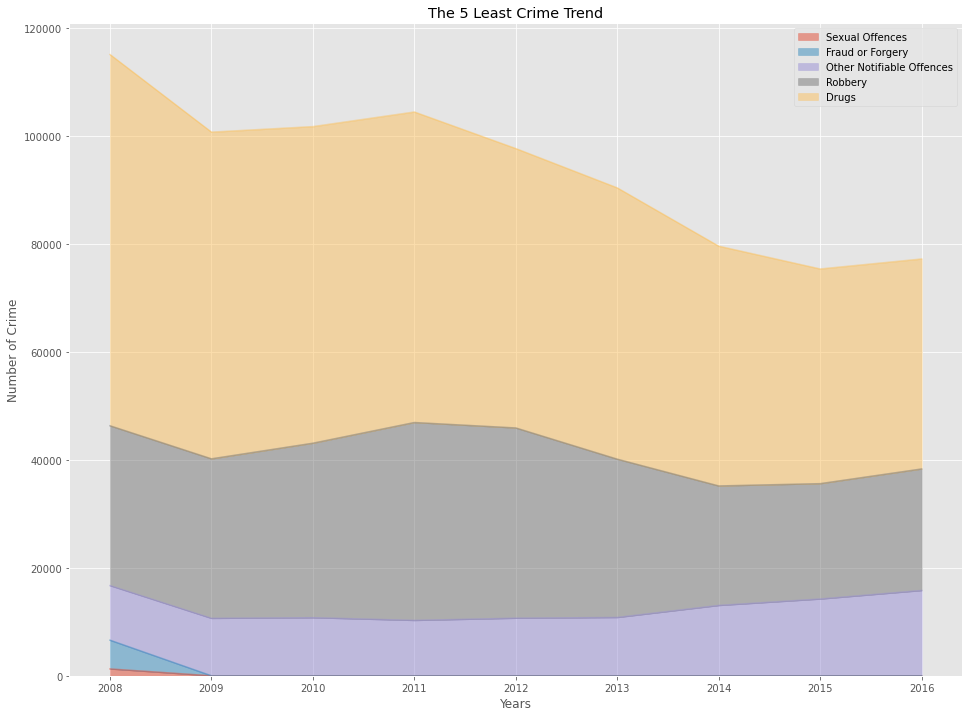

In [16]:
# sort data berdasarkan total masing-masing major category dan mengambil 5 total data terkecil
df_5least_crime = df_major.sort_values(by='Total')[:5]

# Membuat area plot 
df_5least_crime.drop('Total',axis=1).transpose().plot(kind='area', figsize=(16,12), alpha=0.5, stacked=True)
plt.legend(loc='upper right')
plt.title('The 5 Least Crime Trend')
plt.xlabel('Years')
plt.ylabel('Number of Crime')
plt.show()

<b> Dari area plot diatas, dapat diketahui bahwa : </b>
- Sexual offence, fraud or forgery, robbery, drugs dan other notifiable offence adalah 5 major category yang paling kecil terjadi pada tahun 2008-2016
- Sexual offence dan fraud or forgery sangat sedikit terjadi dibandingkan robbery, drugs dan other notifiable offence dan tidak pernah terjadi lagi sejak tahun 2010-2016

# Histogram

## Pertanyaan: Bagaimana angka persebaran kejahatan major category yang terjadi di 5 daerah dengan angka kejahatan tertinggi di London pada tahun 2008-2016? 

In [17]:
# mengelompokkan data total kejahatan berdasarkan major category dan tahun
df_borough = df.groupby(['borough', 'year'])['value'].sum().reset_index()

# kita dapat membuat data major category menjadi index dengan metode pivot table
df_borough = pd.pivot_table(df_borough, values='value', index='borough', columns='year')

# kita dapat mengetahui total angka kejahatan per major category dengan membuat kolom total
df_borough['Total'] = df_borough.sum(axis=1)
df_borough.sort_values(by='Total')

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
City of London,0,0,0,69,157,110,115,151,178,780
Kingston upon Thames,10661,10163,10171,10155,9956,9191,9288,9738,9983,89306
Richmond upon Thames,11106,10618,10601,10896,11168,10439,10456,10413,11074,96771
Sutton,12943,12240,12032,11068,10948,10057,10443,10598,10658,100987
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Merton,13875,13561,13595,13548,12856,11595,11596,12273,12755,115654
Harrow,13774,13948,13945,12801,12803,11914,11909,12601,13153,116848
Havering,15395,14538,14957,15496,15965,15089,14734,15870,16903,138947
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447


In [18]:
#mengambil 5 data Borough dengan angka kejahatan tertinggi
df_tertinggi = df_borough.sort_values(by='Total', ascending=False)[:5]

#Melakukan transpose index dan column yang dapat memudahkan kita dalam pembuatan histogram
df_tertinggi = df_tertinggi.drop(columns='Total').transpose()
df_tertinggi

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


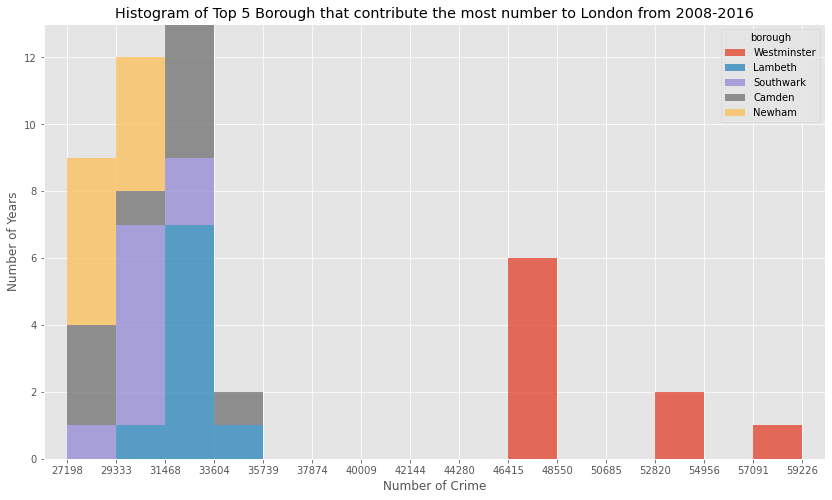

In [19]:
# Membuat bin untuk histogram
count, bin_edges = np.histogram(df_tertinggi, 15)

# memperindah tata letak histogram
xmin = bin_edges[0] - 1000
xmax = bin_edges[-1] + 1000

df_tertinggi.plot(kind='hist',
             figsize=(14,8),
             bins = 15,
             alpha=0.8,
             xticks=bin_edges,
             stacked=True,
             xlim=(xmin,xmax)
           )
plt.title('Histogram of Top 5 Borough that contribute the most number to London from 2008-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Crime')
plt.show()

<b> Dari histogram diatas, dapat diketahui bahwa : </b>
- 5 data Borough dengan angka kejahatan tertinggi di London dari 2008-2016 yaitu Westminster, Lambeth, Southwark, Camden dan Newham 
- Persebaran data kejahatan tertinggi berada pada daerah Westminster yaitu dimulai dari angka 46.415an pertahun,sedangkan 4 Borough lainnya berada dikisaran 27.198 sampai dengan 35.739.

# Bar Chart

## Pertanyaan:Bagaimana angka persebaran kejahatan per bulan di London pada tahun 2016?

In [20]:
# Melakukan pengelompokan data di tahun 2016 berdasarkan major category dan month  
df_month = df[df['year'] == 2016].groupby(['major_category', 'month'])['value'].sum().reset_index()

# kita dapat membuat data month menjadi index dengan metode pivot table
df_month = pd.pivot_table(df_month, values='value', index='month', columns='major_category')

# kita dapat mengetahui total angka kejahatan perbulan dengan membuat kolom total
df_month['Total'] = df_month.sum(axis=1)
df_month

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total
month,,,,,,,,,,
1,6302,5049,3828,0,1276,1810,0,22316,18266,58847
2,5841,5010,3397,0,1133,1646,0,22028,17642,56697
3,5804,5092,3324,0,1256,1711,0,23117,18863,59167
4,5335,5224,3389,0,1302,1570,0,23149,18668,58637
5,5404,5967,3276,0,1543,1787,0,25374,20639,63990
6,5381,5338,3041,0,1432,1885,0,24722,20463,62262
7,5387,5773,3372,0,1457,1960,0,25837,21733,65519
8,5406,5584,3442,0,1386,1910,0,25176,19762,62666
9,5280,5210,3091,0,1318,1980,0,24999,19534,61412


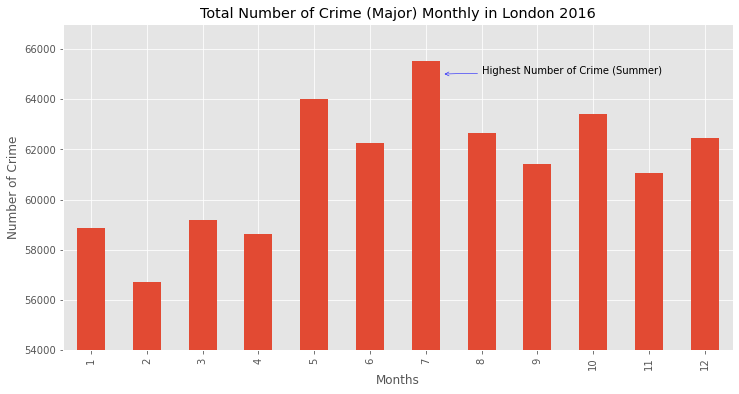

In [21]:
# Membuat bar chart berdasarkan total angka perbulan di tahun 2016
df_month['Total'].plot(kind='bar', figsize=(12,6))

plt.annotate('Highest Number of Crime (Summer)', xy=(6.3,65000), arrowprops=dict(arrowstyle='->', color='b'),xytext=((7,65000)))
plt.ylim(54000,67000)
plt.title('Total Number of Crime (Major) Monthly in London 2016')
plt.xlabel('Months')
plt.ylabel('Number of Crime')

plt.show()

<b> Dari bar chart diatas,dapat diketahui bahwa pada tahun 2016:</b>
- Angka kejahatan tertinggi terjadi pada bulan Juli
- Angka kejahatan yang tinggi biasanya terjadi pada Musim Panas
- Angka kejahatan terendah terjadi pada bulan Februari

# Pie Chart

## Pertanyaan: Bagaimana Persentase Kejahatan Major Category yang terjadi di London pada tahun 2008 - 2016 ?

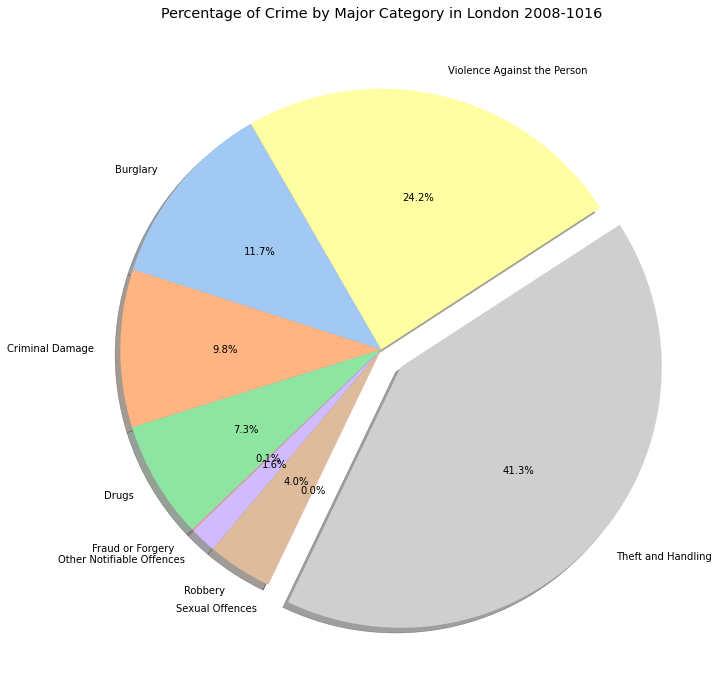

In [22]:
# Mengatur warna pie chart
colors = sns.color_palette('pastel')[:9]

plt.figure(figsize=(12,12))
plt.pie(data=df_major,
        x='Total',
        labels = df_major.index,
        colors = colors,
        autopct='%1.1f%%',
        startangle=120,
        shadow=True,
        explode=[0,0,0,0,0,0,0,0.1,0]
       )
plt.title('Percentage of Crime by Major Category in London 2008-1016')
plt.show()

<b> Berdasarkan pie chart diatas, dapat diketahui bahwa pada tahun 2008-2016: </b>
- Theft and handling yang merupakan major category mempunyai angka persentase tertinggi di London yaitu 41,3%.yang kemudian diikuti oleh violance against person dan burglary dibawahnya
- Sexual offence, fraud or forgery, dan other notifiable offence merupakan major category yang paling sedikit di london

# Box Plot

## Pertanyaan: Bagimana angka persebaran Westminster sebagai daerah dengan tingkat Kejahatan tertinggi di London?

In [23]:
# sort data untuk menemukan data Borough dengan kasus kejahatan terbanyak
df_borough.sort_values(by='Total', ascending=False).head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


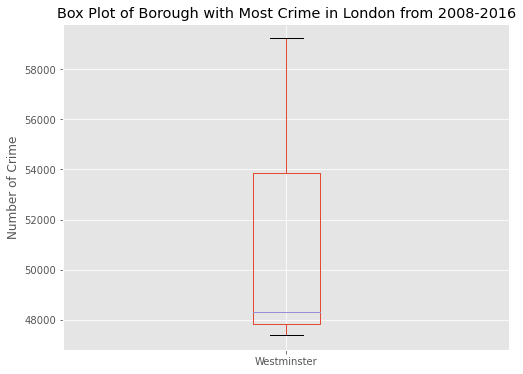

In [24]:
#membuat box plot
df_borough.drop(columns='Total').loc['Westminster'].plot(kind='box',figsize=(8,6))

plt.title('Box Plot of Borough with Most Crime in London from 2008-2016')
plt.ylabel('Number of Crime')
plt.show()

<b> Dari Boxplot diatas, dapat diketahui bahwa : </b>
- Angka maximum dari kejahatan yang terjadi di Westminster sekitar 60.000an
- Angka minimum dari kejahatan yang terjadi di Westminster sekitar 47.000an
- Nilai median berada disekitar 48.000an
- Angka kejahatan sering terjadi pertahunnya berada diantara 48.000an sampai 53.000an

# Scatter Plot

## bagaimana pertumbuhan angka kejahatan pertahun dari 2008 - 2016 di London ?

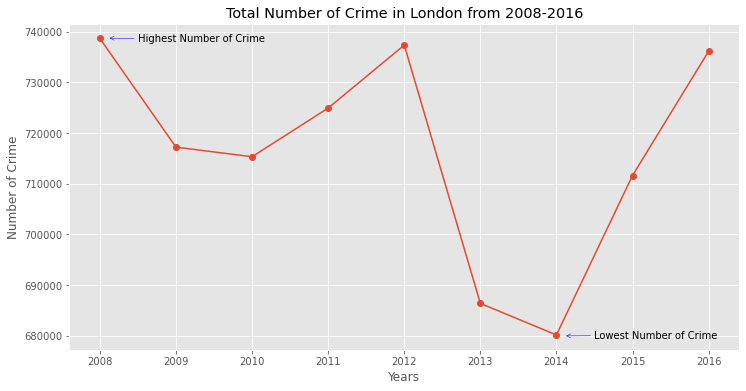

In [25]:
#menjumlahkan data pertahun
df.groupby('year')['value'].sum().plot(figsize=(12,6), marker='o')

plt.xlabel('Years')
plt.ylabel('Number of Crime')
plt.title('Total Number of Crime in London from 2008-2016')

plt.annotate('Highest Number of Crime', xy=(2008.1,738700), arrowprops=dict(arrowstyle='->', color='b'),xytext=((2008.5,738000)))
plt.annotate('Lowest Number of Crime', xy=(2014.1,680000), arrowprops=dict(arrowstyle='->',color='b'),xytext=((2014.5,679500)))
plt.show()

<b> Dari scatter plot diatas,dapat diketahui bahwa : </b>
- Angka kejahatan tertinggi terjadi pada tahun 2008 diantara angka 730.000 dan 740.000 kasus
- Angka kejahatan terrendah terjadi pada tahun 2014 disekitar angka 680.000an kasus
- Angka kejahatan mengalami penurunan pada tahun 2013 dan mulai mengalami kenaikan lagi pada tahun 2015

## Bagaimana Total Angka Persebaran Theft and Handling Crime yang terjadi di London pada 2008-2016 ?

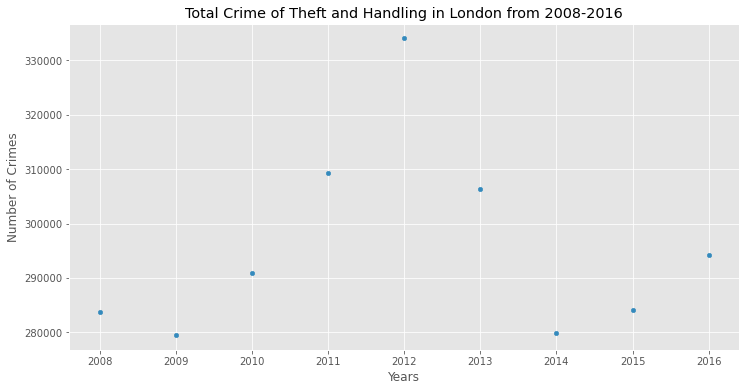

In [26]:
#mengambil data berdasarkan Theft and Handling pertahunnya
theft_per_year = df[df['major_category'] == 'Theft and Handling'].groupby('year')['value'].sum().reset_index()

#Data scatter Plot yang sudah diambil
theft_per_year.plot(kind='scatter', x='year', y='value', figsize=(12,6))
plt.title('Total Crime of Theft and Handling in London from 2008-2016')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

plt.show()

<b> Dari scatter plot diatas,dapat diketahui bahwa : </b>
- Theft and Handling banyak terjadi di London sebanyak 330.000an kasus yang terjadi pada tahun 2012
- Angka terkecil theft and handling terjadi disekitar angka <280.000an yang terjadi pada tahun 2009 
- Theft and Handling mengalami penurunan pada tahun 2013 dan mulai mengalami kenaikan lagi pada tahun 2015

# Word Clouds berdasarkan nama borough dan jumlah Kejahatan yang terjadi pada masing-masing borough

In [27]:
#Mengambil data total kejahatan 
total_crime = df_borough['Total'].sum()

#membuat batasan maximum word
max_words = 90

#membuat wordstring
word_string = ''

#mengisi wordstring
for borough in df_borough.index.values:
    
    #Memisahkan kata yang terdiri dari 2 kata atau lebih
    if len(borough.split(' ')) == 1:
        #menghitung banyaknya kata
        repeat_num_times = int(df_borough.loc[borough,'Total']/float(total_crime)*max_words)
        #mengisi wordstring kata sebanyak berapa kali munculnya
        word_string = word_string + ((borough + ' ')* repeat_num_times)

wordcloud = WordCloud(background_color='white').generate(word_string)

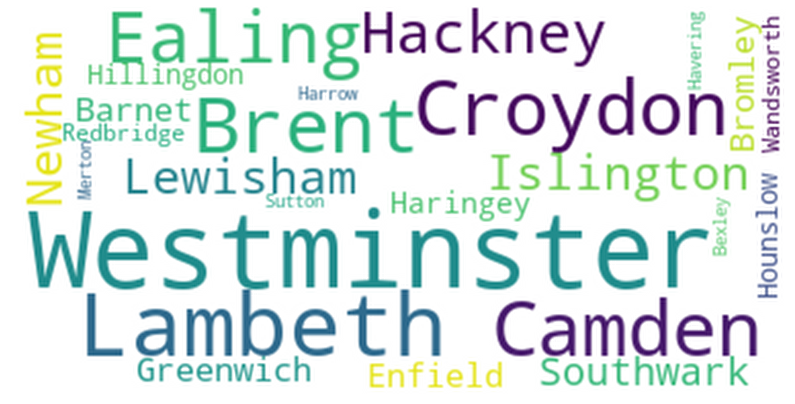

In [28]:
# memvisualisasikan wordcloud 
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bessel')
plt.axis('off')
plt.show()

<b> Dari Word Clouds diatas,dapat diketahui bahwa :</b>
* Borough dengan kasus kejahatan semakin banyak ditandai dengan semakin besar dan semakin gelap warna word cloudsnya 
* 3 Borough dengan tingkat kejahatan yang paling banyak berada di Westminster, Lambeth, Brenth dan Borough  
* Tingkat kejahatan terbanyak terjadi di daerah Westminster

# Folium Maps

## Folium Maps yang saya gunakan adalah Map Choropleth yang memvisualisasikan berbagai bentuk kejahatan yang terjadi di London pada tahun 2016: 

In [30]:
#mengambil geojson london
london_borough = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson'

#membuat map london dengan folium
london_map = folium.Map(location=[51.507359, -0.136439], zoom_start=9.5, tiles='Stamen Terrain')

#mengambil angka kejahatan yang terjadi di borough pada tahun 2016
borough = df_borough.reset_index()[['borough', 2016]]

london_map.choropleth(
    geo_data=london_borough,
    data=borough,
    columns=['borough', 2016],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime in London'
)

#panggil map choropleth
london_map

<b> Dari Map Choropleth diatas,dapat diketahui bahwa :</b>
- Semakin tinggi tingkat kejahatan yang terjadi maka makin merah/makin gelap warna pada area peta  
- Kejahatan tertinggi terjadi pada tahun 2016 
- Map dengan angka kejahatan tertinggi divisualisakan dengan map yang paling gelap yaitu di daerah Westminster

# Kesimpulan

## Dari dataset yang sudah saya visualisasikan di assignment 1 ini,saya dapat membuat suatu kesimpulan yaitu:
- Angka kejahatan tertinggi terjadi pada tahun 2008 di daerah Westminster dengan total angka 47.846 dan angka kejahatan terendah terjadi pada tahun 2008-2016 di daerah City of London dengan total angka 780.
- Angka kejahatan di London mengalami penurunan pada tahun 2013 dan mulai mengalami kenaikan lagi pada tahun 2015
- Angka kejahatan yang tinggi biasanya terjadi pada Musim Panas yaitu pada bulan juli dengan angka diantara 64.000 dan 66.000 serta angka kejahatan yang terendah terjadi pada bulan februari dengan angka diantara 56.000 dan 58.000 di tahun 2016
- Theft and handling yang merupakan major category mempunyai angka persentase tertinggi di London yaitu 41,3% di tahun 2008-2016 
- Other theft,theft from motor vehicle,theft from shops merupakan minor kategori dari Theft and Handling yang paling banyak terjadi dan Handling stolen goods  merupakan minor kategori dari Theft and Handling yang paling sedikit di london pada tahun 2008-2016
- Sexual offence, fraud or forgery, robbery, drugs dan other notifiable offence adalah 5 major category yang paling kecil terjadi pada tahun 2008-2016 serta sexual offence dan fraud or forgery tidak pernah terjadi lagi sejak tahun 2010-2016
- Westminster, Lambeth, Southwark, Camden, Newham merupakan 5 data Borough dengan angka kejahatan tertinggi di London dari tahun 2008-2016

## Tindakan yang dapat pemerintah london ambil pada tahun 2008- 2016 setelah mendapatkan informasi dari data yang telah saya visualisasikan diatas adalah:
- Memperbanyak petugas keamaan di daerah Westminster, Lambeth, Southwark, Camden, Newham terutama didaerah Westminster karena angka pertahunnya tertinggi daripada daerah lainnya di London.
- Menghimbau agar penduduk dan turis di kota london lebih berjaga-jaga ketika memasuki musim panas yaitu pada bulan juli 2016 karena angka kejahatan pada bulan tersebut tinggi yaitu diantara 64.000 dan 66.000
- Menghimbau agar penduduk dan turis di kota-kota yang memiliki angka kejahatan tinggi lebih menjaga keamanan harta mereka.
- Menggunakan CCTV disetiap tempat agar dapat mempermudah melacak pelaku penjahatan yang terjadi pada saat itu
- Menyebar informasi yang mudah dimengerti seperti Peta Choropleth yang terjadi pada tahun 2016 sehingga orang-orang di london mengetahui didaerah mana harus dilakukan penjagaan yang extra

## Strategi bisnis yang bisa diterapkan dari dataset yang telah saya visualisakan diatas adalah:
- Memperkuat penjualan teknologi keamanan seperti CCTV,sensor alarm kejahatan,dll didaerah yang angka kejahatannya tinggi seperti didaerah Westminster
- Perusahaan teknologi keamanan di london dapat menjual barang-barang yang mencegah pencurian di kendaraan, toko, rumah dan diri sendiri. Dapat berupa CCTV, alarm, atau melacak harta berharga karena minor kategori dari Theft and Handling yang paling banyak terjadi yaitu Other theft,theft from motor vehicle dan theft from shops